# Character-level RNNs in PyTorch

The `10_char_level_rnn` notebook explores the use of recurrent neural networks (RNNs) for character-level text generation. Character-level models process text one character at a time, making them capable of generating text sequences in a variety of tasks, such as text prediction and creative writing. 

This notebook covers preparing the dataset, processing and encoding text, building and training a character-level RNN model, and generating new text using the trained model. It also examines evaluating model performance and adjusting hyperparameters for optimization.

## Table of contents

1. [Understanding character-level RNNs](#understanding-character-level-rnns)
2. [Setting up the environment](#setting-up-the-environment)
3. [Preparing the dataset](#preparing-the-dataset)
4. [Text processing and encoding](#text-processing-and-encoding)
5. [Building the character-level RNN model](#building-the-character-level-rnn-model)
6. [Training the RNN model](#training-the-rnn-model)
7. [Generating text with the trained model](#generating-text-with-the-trained-model)
8. [Evaluating model performance](#evaluating-model-performance)
9. [Hyperparameter adjustments](#hyperparameter-adjustments)

## Understanding character-level RNNs

Character-level RNNs are a specialized form of recurrent neural networks designed to model and generate sequences at the character level, rather than at the word or sentence level. These networks process input text as a sequence of individual characters, making them suitable for tasks like text generation, language modeling, and character-based text classification.

### **Why character-level RNNs?**

While word-level RNNs treat words as atomic units, character-level RNNs break down text into its smallest meaningful components—characters. This granularity allows character-level models to capture finer details of a language, such as letter combinations, grammar rules, and even misspellings. It also enables them to handle vocabulary that is dynamic or composed of unique symbols (e.g., programming code or domain-specific text) without the need for a predefined vocabulary.

Character-level RNNs have advantages in several areas:
- They can work without a predefined vocabulary, making them useful for tasks involving uncommon words or symbols.
- They are capable of generating completely new words or combinations of characters, which is particularly beneficial in creative tasks like poetry or code generation.
- They naturally handle spelling variations and errors, as they model text at the character level rather than relying on known word structures.

### **Key concepts of character-level RNNs**

#### **Character embeddings**

In character-level RNNs, each character is represented as a vector, often using an embedding. Embeddings map each character in the vocabulary to a dense vector of fixed size, capturing the relationships between characters in the dataset. Unlike word embeddings, which map each word to a vector, character embeddings allow the RNN to represent and learn patterns from individual letters and symbols.

Let’s denote the vocabulary of characters as $ C $, which includes letters, digits, punctuation marks, and special tokens (e.g., spaces). The character embedding layer transforms each character $ c_t $ at time step $ t $ into an embedding vector $ e_t $:

$$
e_t = \text{Embedding}(c_t)
$$

The embedding vectors are then fed into the recurrent layers of the RNN.

#### **Recurrent structure for character sequences**

Like other RNNs, a character-level RNN processes input sequentially, character by character. At each time step $ t $, the model takes the character embedding $ e_t $ as input, updates its hidden state $ h_t $, and predicts the next character in the sequence.

The hidden state $ h_t $ is computed using the standard RNN recurrence relation:

$$
h_t = f(W_{hh} h_{t-1} + W_{xh} e_t + b_h)
$$

where:
- $ h_t $ is the hidden state at time step $ t $,
- $ W_{hh} $ is the weight matrix for the hidden state,
- $ W_{xh} $ is the weight matrix for the character embedding,
- $ b_h $ is the bias term for the hidden state,
- $ f $ is an activation function, typically **tanh** or **ReLU**.

The output of the network at each time step, $ o_t $, is a probability distribution over the possible characters in the vocabulary, typically obtained using a softmax function:

$$
o_t = \text{softmax}(W_{ho} h_t + b_o)
$$

where $ W_{ho} $ is the output weight matrix, and $ b_o $ is the output bias. The network predicts the next character by sampling from this probability distribution.

#### **Character prediction and sequence generation**

Character-level RNNs are often used for sequence generation, where the model predicts the next character in a sequence based on the characters seen so far. After each prediction, the predicted character is fed back into the network as the input for the next time step. This process allows the network to generate text one character at a time.

Given an initial input character or sequence, the network continues generating characters until a stopping condition is met (e.g., a specified sequence length or an end-of-sequence token).

#### **Long-range dependencies and challenges**

Character-level RNNs need to capture dependencies not only between adjacent characters but also across longer spans of text. For example, in English, the letter "u" is often followed by "r" in certain contexts, but the word structure and meaning often depend on characters several steps apart.

Standard RNNs struggle with such long-range dependencies due to the vanishing gradient problem. To address this, advanced RNN architectures like **Long Short-Term Memory (LSTM)** and **Gated Recurrent Unit (GRU)** are commonly used in character-level RNNs. These architectures are better at maintaining and updating information over longer sequences, allowing the model to learn dependencies across distant characters in a sequence.

### **Applications of character-level RNNs**

Character-level RNNs have a range of applications, particularly in tasks where character-level modeling is advantageous over word-level approaches. Some common applications include:

- **Text generation**: Character-level RNNs are often used to generate creative text, such as stories, poetry, or song lyrics. The model generates text one character at a time, producing novel combinations of characters that form coherent sentences or phrases.
- **Language modeling**: Character-level RNNs can model the probability distribution of characters in a language, learning patterns such as letter combinations and syntax. This is useful for tasks like spelling correction or text completion.
- **Text classification**: In classification tasks, character-level RNNs can be used to classify sequences of characters, such as identifying the language of a text or detecting spam messages based on the character patterns in a message.
- **Code generation and modeling**: Character-level RNNs are particularly useful in domains like programming, where sequences of characters (such as code or mathematical symbols) are critical. These models can be used to predict the next character in a piece of code or generate new code snippets.

### **Advantages of character-level RNNs**

Character-level RNNs offer several advantages over word-level models:

- **No predefined vocabulary**: Since character-level RNNs operate at the character level, there is no need for a fixed vocabulary of words. This makes them flexible and applicable to tasks where new or rare words are common.
- **Handling rare and out-of-vocabulary words**: By focusing on characters rather than words, these models can generate or interpret novel words and sequences that are not present in the training data.
- **Finer granularity**: Character-level models capture detailed patterns in the structure of a language, including spelling, punctuation, and formatting.

### **Limitations of character-level RNNs**

Despite their advantages, character-level RNNs also have some limitations:

- **Longer training times**: Character-level models require longer sequences to learn meaningful patterns since each word is represented by multiple characters. This increases the computational cost of training.
- **Difficulty with long-range dependencies**: While LSTMs and GRUs can help alleviate the vanishing gradient problem, it is still challenging for character-level RNNs to capture very long-range dependencies in sequences.

## Setting up the environment

##### **Q1: How do you install the necessary libraries for building and training character-level RNNs in PyTorch?**


In [1]:
# !pip install torch torchvision numpy matplotlib

##### **Q2: How do you import the required modules for text processing, model building, and training in PyTorch?**


In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

##### **Q3: How do you set up your environment to use a GPU if available, or fallback to a CPU in PyTorch?**


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


##### **Q4: How do you set a random seed in PyTorch to ensure reproducibility of results?**

In [4]:
torch.manual_seed(42)
np.random.seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)

## Preparing the dataset

##### **Q5: How do you load a text dataset from a file in Python for use in a character-level RNN?**


In [5]:
import urllib.request

# Downloading 'The Adventures of Sherlock Holmes':
url = "https://www.gutenberg.org/files/1661/1661-0.txt"  
filename = "sherlock_holmes.txt"
urllib.request.urlretrieve(url, filename)

with open(filename, 'r', encoding='utf-8') as f:
    text = f.read()

print(f"Loaded {len(text)} characters from the dataset.")

Loaded 581425 characters from the dataset.


##### **Q6: How do you inspect the contents and length of the loaded text dataset?**


In [7]:
print(f"Sample of dataset: {text[:500]}\n")
print(f"Length of the dataset: {len(text)} characters")

Sample of dataset: ﻿The Project Gutenberg eBook of The Adventures of Sherlock Holmes,
by Arthur Conan Doyle

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United States, you
will have to check the laws of the country where you are 

Length of the dataset: 581425 characters


##### **Q7: How do you split the loaded text dataset into training and validation sets?**

In [8]:
split_ratio = 0.9
split_index = int(len(text) * split_ratio)
train_text = text[:split_index]
val_text = text[split_index:]

print(f"Training set length: {len(train_text)}")
print(f"Validation set length: {len(val_text)}")

Training set length: 523282
Validation set length: 58143


## Text processing and encoding

##### **Q8: How do you create a character-to-index mapping for the text dataset in PyTorch?**


In [10]:
chars = sorted(list(set(text)))
char_to_idx = {ch: idx for idx, ch in enumerate(chars)}

print(f"Unique characters: {chars}\n")
print(f"Character to index mapping: {char_to_idx}")

Unique characters: ['\n', ' ', '!', '#', '$', '%', '&', '(', ')', '*', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '£', '½', 'à', 'â', 'æ', 'è', 'é', 'œ', '—', '‘', '’', '“', '”', '•', '™', '\ufeff']

Character to index mapping: {'\n': 0, ' ': 1, '!': 2, '#': 3, '$': 4, '%': 5, '&': 6, '(': 7, ')': 8, '*': 9, ',': 10, '-': 11, '.': 12, '/': 13, '0': 14, '1': 15, '2': 16, '3': 17, '4': 18, '5': 19, '6': 20, '7': 21, '8': 22, '9': 23, ':': 24, ';': 25, '?': 26, 'A': 27, 'B': 28, 'C': 29, 'D': 30, 'E': 31, 'F': 32, 'G': 33, 'H': 34, 'I': 35, 'J': 36, 'K': 37, 'L': 38, 'M': 39, 'N': 40, 'O': 41, 'P': 42, 'Q': 43, 'R': 44, 'S': 45, 'T': 46, 'U': 47, 'V': 48, 'W': 49, 'X': 50, 'Y':

##### **Q9: How do you create an index-to-character mapping for decoding model outputs in PyTorch?**


In [11]:
idx_to_char = {idx: ch for ch, idx in char_to_idx.items()}

print(f"Index to character mapping: {idx_to_char}")

Index to character mapping: {0: '\n', 1: ' ', 2: '!', 3: '#', 4: '$', 5: '%', 6: '&', 7: '(', 8: ')', 9: '*', 10: ',', 11: '-', 12: '.', 13: '/', 14: '0', 15: '1', 16: '2', 17: '3', 18: '4', 19: '5', 20: '6', 21: '7', 22: '8', 23: '9', 24: ':', 25: ';', 26: '?', 27: 'A', 28: 'B', 29: 'C', 30: 'D', 31: 'E', 32: 'F', 33: 'G', 34: 'H', 35: 'I', 36: 'J', 37: 'K', 38: 'L', 39: 'M', 40: 'N', 41: 'O', 42: 'P', 43: 'Q', 44: 'R', 45: 'S', 46: 'T', 47: 'U', 48: 'V', 49: 'W', 50: 'X', 51: 'Y', 52: 'Z', 53: '[', 54: ']', 55: '_', 56: 'a', 57: 'b', 58: 'c', 59: 'd', 60: 'e', 61: 'f', 62: 'g', 63: 'h', 64: 'i', 65: 'j', 66: 'k', 67: 'l', 68: 'm', 69: 'n', 70: 'o', 71: 'p', 72: 'q', 73: 'r', 74: 's', 75: 't', 76: 'u', 77: 'v', 78: 'w', 79: 'x', 80: 'y', 81: 'z', 82: '£', 83: '½', 84: 'à', 85: 'â', 86: 'æ', 87: 'è', 88: 'é', 89: 'œ', 90: '—', 91: '‘', 92: '’', 93: '“', 94: '”', 95: '•', 96: '™', 97: '\ufeff'}


##### **Q10: How do you encode the entire text dataset into numerical format using the character-to-index mapping?**


In [12]:
train_encoded = [char_to_idx[ch] for ch in train_text]
val_encoded = [char_to_idx[ch] for ch in val_text]

print(f"Encoded training dataset sample: {train_encoded[:10]}\n")
print(f"Encoded validation dataset sample: {val_encoded[:10]}")

Encoded training dataset sample: [97, 46, 63, 60, 1, 42, 73, 70, 65, 60]

Encoded validation dataset sample: [73, 1, 49, 64, 69, 58, 63, 60, 74, 75]


##### **Q11: How do you generate input sequences and corresponding target sequences for training a character-level RNN in PyTorch?**

In [15]:
def get_batches(data, seq_length, batch_size):
    total_batch_length = (len(data) // (batch_size * seq_length)) * batch_size * seq_length  # Ensure data is divisible by batch_size and seq_length
    
    data = np.array(data[:total_batch_length])  # Trim the data to fit into exact batches
    
    data = data.reshape((batch_size, -1))  # Reshape data into batch_size rows
    
    for n in range(0, data.shape[1] - seq_length, seq_length):
        x = data[:, n:n + seq_length]
        y = data[:, n + 1:n + seq_length + 1]
        yield x, y  # Yield the batches

In [16]:
seq_length = 100
batch_size = 64

batches = get_batches(train_encoded, seq_length, batch_size)
x_batch, y_batch = next(batches)

print(f"Input batch shape: {x_batch.shape}\n")
print(f"Target batch shape: {y_batch.shape}")

Input batch shape: (64, 100)

Target batch shape: (64, 100)


## Building the character-level RNN model

##### **Q12: How do you define the architecture of a character-level RNN using PyTorch’s `nn.RNN` or `nn.LSTM` module?**


In [17]:
class CharRNN(nn.Module):
    def __init__(self, vocab_size, hidden_size, output_size, n_layers=1):
        super(CharRNN, self).__init__()
        self.hidden_size = hidden_size
        self.n_layers = n_layers
        
        self.embedding = nn.Embedding(vocab_size, hidden_size)
        self.lstm = nn.LSTM(hidden_size, hidden_size, n_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x, hidden):
        x = self.embedding(x)
        out, hidden = self.lstm(x, hidden)
        out = self.fc(out)
        return out, hidden

In [18]:
vocab_size = len(chars)
hidden_size = 256
output_size = vocab_size

model = CharRNN(vocab_size, hidden_size, output_size).to(device)
print(model)

CharRNN(
  (embedding): Embedding(98, 256)
  (lstm): LSTM(256, 256, batch_first=True)
  (fc): Linear(in_features=256, out_features=98, bias=True)
)


##### **Q13: How do you specify the input size, hidden size, and output size when building the RNN model in PyTorch?**


In [19]:
# Same as above, i.e.,
vocab_size = len(chars)
hidden_size = 256
output_size = vocab_size

##### **Q14: How do you initialize the hidden state of the RNN before passing data through the model?**


In [20]:
def init_hidden(batch_size):
    return (torch.zeros(1, batch_size, hidden_size).to(device),
            torch.zeros(1, batch_size, hidden_size).to(device))

hidden = init_hidden(batch_size)

##### **Q15: How do you implement the forward pass of the RNN model to process an input sequence and predict the next character?**

In [21]:
x_batch = torch.tensor(x_batch).to(device)
output, hidden = model(x_batch, hidden)
print(f"Output shape: {output.shape}")

Output shape: torch.Size([64, 100, 98])


## Training the RNN model

##### **Q16: How do you define the loss function for training the character-level RNN model in PyTorch?**


In [22]:
criterion = nn.CrossEntropyLoss()

##### **Q17: How do you select and configure an optimizer for training the RNN model in PyTorch?**


In [23]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

##### **Q18: How do you implement a training loop that updates model weights based on the loss in PyTorch?**


In [26]:
def train(model, data, epochs=10, seq_length=100, batch_size=64):
    model.train()
    
    for epoch in range(epochs):
        hidden = init_hidden(batch_size)
        total_loss = 0
        
        for x_batch, y_batch in get_batches(data, seq_length, batch_size):
            x_batch = torch.tensor(x_batch).to(device)
            y_batch = torch.tensor(y_batch).to(device)
            
            hidden = tuple([h.data for h in hidden])
            model.zero_grad()
            output, hidden = model(x_batch, hidden)
            
            loss = criterion(output.view(-1, vocab_size), y_batch.view(-1))
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
        
        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(data)}')
        
        # print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(data)}")

In [27]:
train(model, train_encoded, epochs=100)

Epoch [10/100], Loss: 0.00018867617742997637
Epoch [20/100], Loss: 0.00017814544814552072
Epoch [30/100], Loss: 0.0001712902184899871
Epoch [40/100], Loss: 0.00016500712631123643
Epoch [50/100], Loss: 0.00016120897494380796
Epoch [60/100], Loss: 0.000156127503961061
Epoch [70/100], Loss: 0.000156241672367198
Epoch [80/100], Loss: 0.00015180472448906687
Epoch [90/100], Loss: 0.00014875822698734046
Epoch [100/100], Loss: 0.0001466493521393482


##### **Q19: How do you implement gradient clipping to prevent exploding gradients during the training of the RNN model in PyTorch?**


In [28]:
def train_with_gradient_clipping(model, data, epochs=10, seq_length=100, batch_size=64, clip_value=5):
    model.train()
    
    for epoch in range(epochs):
        hidden = init_hidden(batch_size)
        total_loss = 0
        
        for x_batch, y_batch in get_batches(data, seq_length, batch_size):
            x_batch = torch.tensor(x_batch).to(device)
            y_batch = torch.tensor(y_batch).to(device)
            
            hidden = tuple([h.data for h in hidden])
            model.zero_grad()
            output, hidden = model(x_batch, hidden)
            
            loss = criterion(output.view(-1, vocab_size), y_batch.view(-1))
            loss.backward()
            
            torch.nn.utils.clip_grad_norm_(model.parameters(), clip_value)  # Gradient clipping
            
            optimizer.step()
            total_loss += loss.item()
            
        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(data)}')
        
        # print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(data)}")

In [30]:
train_with_gradient_clipping(model, train_encoded, epochs=100)

Epoch [10/100], Loss: 0.00014202048220752868
Epoch [20/100], Loss: 0.00014089799644546644
Epoch [30/100], Loss: 0.0001398295223452989
Epoch [40/100], Loss: 0.00014102610379694284
Epoch [50/100], Loss: 0.00013655867585930253
Epoch [60/100], Loss: 0.0001347310694344897
Epoch [70/100], Loss: 0.00013377046944203948
Epoch [80/100], Loss: 0.00013128647427333622
Epoch [90/100], Loss: 0.0001322728429701999
Epoch [100/100], Loss: 0.00013143660056350512


##### **Q20: How do you monitor and plot the training loss over epochs in PyTorch?**

In [33]:
losses = []

def train_with_loss_tracking(model, data, epochs=10, seq_length=100, batch_size=64, clip_value=5):
    model.train()
    
    for epoch in range(epochs):
        hidden = init_hidden(batch_size)
        total_loss = 0
        
        for x_batch, y_batch in get_batches(data, seq_length, batch_size):
            x_batch = torch.tensor(x_batch).to(device)
            y_batch = torch.tensor(y_batch).to(device)
            
            hidden = tuple([h.data for h in hidden])
            model.zero_grad()
            output, hidden = model(x_batch, hidden)
            
            loss = criterion(output.view(-1, vocab_size), y_batch.view(-1))
            loss.backward()
            
            torch.nn.utils.clip_grad_norm_(model.parameters(), clip_value)
            
            optimizer.step()
            total_loss += loss.item()
        
        avg_loss = total_loss / len(data)
        losses.append(avg_loss)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss}")

    plt.plot(losses)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.show()

Epoch 1/20, Loss: 0.0001309185074394663
Epoch 2/20, Loss: 0.00013102587649064637
Epoch 3/20, Loss: 0.00013116183556905711
Epoch 4/20, Loss: 0.0001311058868319543
Epoch 5/20, Loss: 0.00013125634937085978
Epoch 6/20, Loss: 0.0001307637815353977
Epoch 7/20, Loss: 0.0001298988558129508
Epoch 8/20, Loss: 0.00012969721728704802
Epoch 9/20, Loss: 0.0001293932033226386
Epoch 10/20, Loss: 0.00013002030903885343
Epoch 11/20, Loss: 0.00013018155044562576
Epoch 12/20, Loss: 0.0001292883008928646
Epoch 13/20, Loss: 0.00012865851976664812
Epoch 14/20, Loss: 0.0001289235965374206
Epoch 15/20, Loss: 0.0001294632456886121
Epoch 16/20, Loss: 0.00013056614450614675
Epoch 17/20, Loss: 0.0001305070240732207
Epoch 18/20, Loss: 0.00013018835401508243
Epoch 19/20, Loss: 0.00012977697453056032
Epoch 20/20, Loss: 0.00012892120862464495


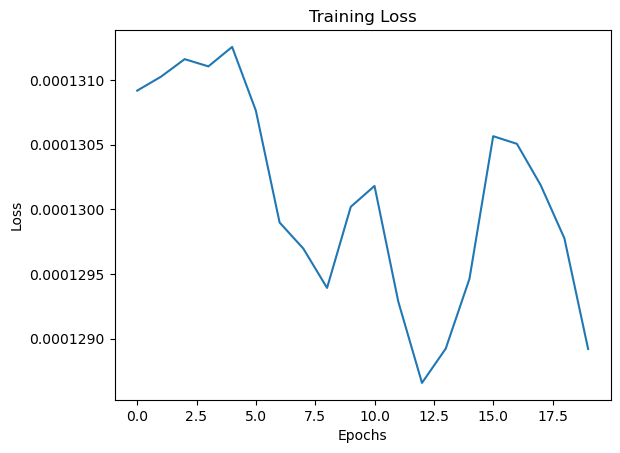

In [34]:
train_with_loss_tracking(model, train_encoded, epochs=20)

## Generating text with the trained model

##### **Q21: How do you implement a function to generate text sequences from the trained RNN model in PyTorch?**

In [38]:
def generate_text(model, start_string, length=100):
    model.eval()
    
    input_chars = [char_to_idx[ch] for ch in start_string]
    input_tensor = torch.tensor(input_chars).unsqueeze(0).to(device)
    
    hidden = init_hidden(1)
    predicted_text = start_string
    
    with torch.no_grad():
        for _ in range(length):
            output, hidden = model(input_tensor, hidden)
            
            predicted_char_idx = output[:, -1].argmax(dim=-1).item()  # Extract the prediction for the last character in the sequence (last time step)
            
            predicted_char = idx_to_char[predicted_char_idx]
            predicted_text += predicted_char  # Convert the predicted index to the corresponding character
            
            input_tensor = torch.tensor([predicted_char_idx]).unsqueeze(0).to(device)  # Prepare the input tensor for the next iteration
    
    return predicted_text

In [40]:
print(generate_text(model, "Holmes", length=100))

Holmes; ‘Reamously turns. I shall
not go to the street. All reach of the matter should be able to
see the 


In [42]:
print(generate_text(model, "Sherlock", length=500))

Sherlock is in his hat and passing
in the street. “We have the matter will call you, it is a most single
sense for the matter?”

“It is not a clever man with a little more close from him, and I can
hardly have a confession, was his chair, with his head sunk upon his
hands.

“He is a distinct party came to the coronet and the corner of the
passage, where a low lastering facts are so in time. I have no doubt
that I have spoken before you,” said Holmes, “that the passage, done
himself down the street. “We 


In [43]:
print(generate_text(model, "detective", length=1000))

detective. His staggered with the
last time, and the corner of the cracks which had been less spoke, and
the corners of the cracks which had been lying into a case and was standing
streets which compellow, there was not unfortunate enoughs were so simple
as well to the corner of the cress of the corner of the cressionen
assistant and secured.

“Coarse Angel?”

“On your father will call five minutes.”

It was dead, supplied with his finger-tips which I have no doubt that
the contrary, had or considerable shoes story and was struck from the
street. And where is it that I have sponged, the corner of the
passage, and then he comes heard of all on our two lens in his
constable secrecy, and the cab and was standing by the company behind her
considerable seven minutes. I had not be some results and his hands
of the watered laughes which had been lying into a case had been
assistance, and he was something very care as we could not see the
corner of the cressions were all the corner of the cres

##### **Q22: How do you generate text character by character starting from a seed string using the trained model?**


In [44]:
# See Q21 - text generation based on a seed string and continued character by character.

##### **Q23: How do you experiment with different temperature values to control the creativity and diversity of the generated text?**


In [48]:
def sample_from_model(output, temperature=1.0):
    output = output[:, -1, :]  # Get the logits for the last time step
    
    output = output / temperature  # Apply temperature scaling

    probabilities = torch.softmax(output, dim=-1).squeeze()  # Apply softmax to get probabilities
    
    predicted_char_idx = torch.multinomial(probabilities, 1).item()  # Sample from the probability distribution
    
    return predicted_char_idx

In [49]:
def generate_text_with_temperature(model, start_string, length=100, temperature=1.0):
    model.eval()
    
    input_chars = [char_to_idx[ch] for ch in start_string]
    input_tensor = torch.tensor(input_chars).unsqueeze(0).to(device)
    
    hidden = init_hidden(1)
    predicted_text = start_string
    
    with torch.no_grad():
        for _ in range(length):
            output, hidden = model(input_tensor, hidden)
            predicted_char_idx = sample_from_model(output, temperature)
            
            if predicted_char_idx >= len(idx_to_char):  # Safeguard to prevent out-of-bound index predictions
                predicted_char_idx = len(idx_to_char) - 1
            
            predicted_char = idx_to_char[predicted_char_idx]
            predicted_text += predicted_char
            
            input_tensor = torch.tensor([predicted_char_idx]).unsqueeze(0).to(device)
    
    return predicted_text

In [50]:
print(generate_text_with_temperature(model, "Holmes", length=100, temperature=0.5))

Holmes; ‘Ream sure of interest,” said
Holmes.

“What don’t know there!” said he, “is these easy now,” I re


In [51]:
print(generate_text_with_temperature(model, "Sherlock", length=500, temperature=0.5))

Sherlock #1661]
[Mosmite does.”

“Why were attensive such as you may say that I have brought yet.”

The note of the facts had delight’
and struck him the business case of assiston, told morning in
the snow when he was a little landlord, “well have been in at last
not let me are in the character of your sharp forward,” even ordered the
name of his face. In the corner of the morning broke one of the sort in
the stairs which had been details with his face. And she is the other
sirple and a narrow central p


In [52]:
print(generate_text_with_temperature(model, "detective", length=1000, temperature=0.5))

detective. His strange place, but
there was not in the street. And when I presumed some grave upon his
pockets, which is rain.

“When did the inspector was full precaution can break a stands of
this order to place?”

“It is not assocking to her clothes,” said he. “It is not the
large one.”

“And you can hardly live all the corner of the whistless full of his
coronet, there was a trapforsons was so, and we wincelly proper and
the maid, has see. “You have seen he did not tell when I shall be
good enough.”

“It is K. S.”

“‘Oness’ shadon will called at me. Your wife’s arranged to you.”

“It is always found that I had no own stile, Mr. Holmes. I am ever.

“‘Where will be each o’clock 2ver are the maid, then?”

“That was so. I have already glanced at the rooms which the alone could
have spend the other. I pass of the coming paper upon the silence and
still wanted shown, she saw some gentleman who had not been with a little mort
and had give you to get the same with which he could not go, an

##### **Q24: How do you ensure that the model generates text with a specific length or number of characters?**

In [53]:
# Already implemented in Q21 and Q23, when specifying the "length" parameter.

## Evaluating model performance

##### **Q25: How do you evaluate the model’s performance in predicting the next character in a sequence on a validation set in PyTorch?**


In [54]:
def evaluate_model_on_validation(model, val_data, seq_length=100, batch_size=64):
    model.eval()
    total_loss = 0
    hidden = init_hidden(batch_size)
    
    with torch.no_grad():
        for x_batch, y_batch in get_batches(val_data, seq_length, batch_size):
            x_batch = torch.tensor(x_batch).to(device)
            y_batch = torch.tensor(y_batch).to(device)
            
            hidden = tuple([h.data for h in hidden])
            output, hidden = model(x_batch, hidden)
            
            loss = criterion(output.view(-1, vocab_size), y_batch.view(-1))
            total_loss += loss.item()
    
    return total_loss / len(val_data)

In [55]:
val_loss = evaluate_model_on_validation(model, val_encoded)
print(f"Validation Loss: {val_loss}")

Validation Loss: 0.00028591060011862906


##### **Q26: How do you calculate and interpret the perplexity score for the character-level RNN model?**


In [56]:
def perplexity(loss):
    return torch.exp(torch.tensor(loss))

In [57]:
val_loss = evaluate_model_on_validation(model, val_encoded)
perplexity_score = perplexity(val_loss)
print(f"Validation Perplexity: {perplexity_score.item()}")

Validation Perplexity: 1.0002859830856323


##### **Q27: How do you visualize the model’s predictions versus the actual next characters in a sequence?**

In [58]:
def visualize_predictions(model, text, seq_length=100):
    model.eval()
    input_text = text[:seq_length]
    input_chars = [char_to_idx[ch] for ch in input_text]
    input_tensor = torch.tensor(input_chars).unsqueeze(0).to(device)
    
    hidden = init_hidden(1)
    predicted_text = input_text
    
    with torch.no_grad():
        output, hidden = model(input_tensor, hidden)
        predicted_char_idx = output.argmax(dim=-1).cpu().numpy()
        predicted_chars = ''.join([idx_to_char[idx] for idx in predicted_char_idx[0]])
    
    print(f"Input Text: {input_text}")
    print(f"Predicted Text: {predicted_chars}")

In [59]:
visualize_predictions(model, val_text[:500])

Input Text: r Winchester.

    “‘DEAR MISS HUNTER,—Miss Stoper has very kindly given me your
    address, and I 
Predicted Text: isaldoerpar ”
“  T“TYE   SRNHHEERdU T Yyg,.Htr.en wav reny cind y,teve  yy tou,
f    ndoess  Mnd t c


## Hyperparameter adjustments

##### **Q28: How do you experiment with different learning rates to observe their impact on the model’s training performance?**


In [60]:
def train_with_different_lr(model, data, learning_rates, epochs=10, seq_length=100, batch_size=64):
    for lr in learning_rates:
        print(f"Training with learning rate: {lr}")
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        model.train()
        
        for epoch in range(epochs):
            hidden = init_hidden(batch_size)
            total_loss = 0
            
            for x_batch, y_batch in get_batches(data, seq_length, batch_size):
                x_batch = torch.tensor(x_batch).to(device)
                y_batch = torch.tensor(y_batch).to(device)
                
                hidden = tuple([h.data for h in hidden])
                model.zero_grad()
                output, hidden = model(x_batch, hidden)
                
                loss = criterion(output.view(-1, vocab_size), y_batch.view(-1))
                loss.backward()
                optimizer.step()
                
                total_loss += loss.item()
            
            avg_loss = total_loss / len(data)
            print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss}")
        print("-" * 50)

In [61]:
learning_rates = [0.001, 0.0005, 0.0001]
train_with_different_lr(model, train_encoded, learning_rates, epochs=10)

Training with learning rate: 0.001
Epoch 1/10, Loss: 0.0001291499128957347
Epoch 2/10, Loss: 0.00012755735458927972
Epoch 3/10, Loss: 0.00012723485070323634
Epoch 4/10, Loss: 0.0001272999691666404
Epoch 5/10, Loss: 0.00012720583216389622
Epoch 6/10, Loss: 0.00012685937101099284
Epoch 7/10, Loss: 0.00012749298790150625
Epoch 8/10, Loss: 0.00012803899126535707
Epoch 9/10, Loss: 0.00012844275013699854
Epoch 10/10, Loss: 0.00012756101949547877
--------------------------------------------------
Training with learning rate: 0.0005
Epoch 1/10, Loss: 0.00012952842156033702
Epoch 2/10, Loss: 0.00012964029135553083
Epoch 3/10, Loss: 0.0001273469797471173
Epoch 4/10, Loss: 0.00012583209934112366
Epoch 5/10, Loss: 0.0001245266504127815
Epoch 6/10, Loss: 0.00012371080219817396
Epoch 7/10, Loss: 0.00012286456071997098
Epoch 8/10, Loss: 0.00012217458639978467
Epoch 9/10, Loss: 0.00012237535548578014
Epoch 10/10, Loss: 0.00012168240538705614
--------------------------------------------------
Training 

##### **Q29: How do you adjust the hidden size of the RNN model, and what impact does it have on the model's ability to generate text?**


Training with hidden size: 128
Epoch 1/5, Loss: 0.0007048204618832889
Epoch 2/5, Loss: 0.0007048204618832889
Epoch 3/5, Loss: 0.0007048204618832889
Epoch 4/5, Loss: 0.0007048204618832889
Epoch 5/5, Loss: 0.0007048204618832889


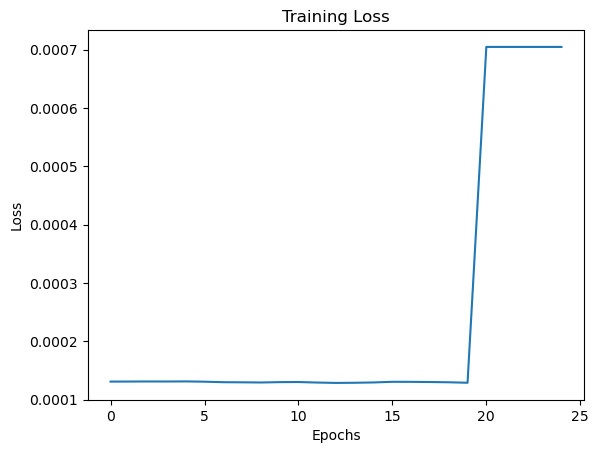

--------------------------------------------------
Training with hidden size: 256
Epoch 1/5, Loss: 0.0007023278408865626
Epoch 2/5, Loss: 0.0007023278408865626
Epoch 3/5, Loss: 0.0007023278408865626
Epoch 4/5, Loss: 0.0007023278408865626
Epoch 5/5, Loss: 0.0007023278408865626


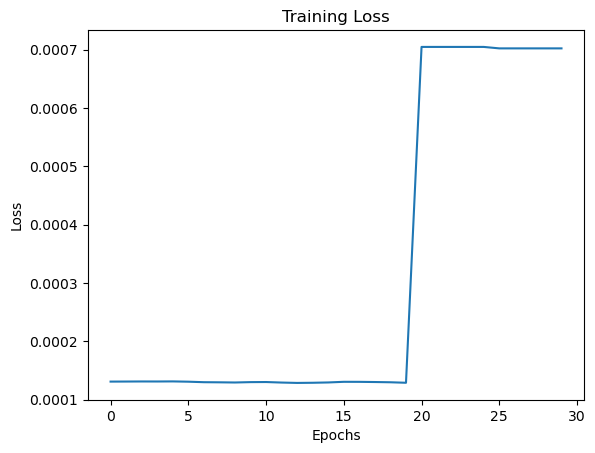

--------------------------------------------------
Training with hidden size: 512
Epoch 1/5, Loss: 0.000701793419537544
Epoch 2/5, Loss: 0.000701793419537544
Epoch 3/5, Loss: 0.000701793419537544
Epoch 4/5, Loss: 0.000701793419537544
Epoch 5/5, Loss: 0.000701793419537544


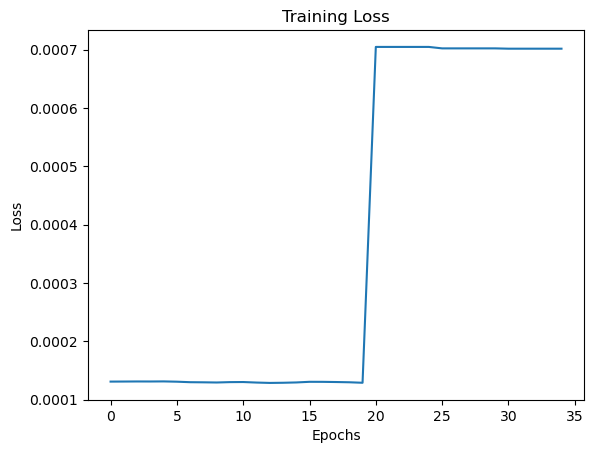

--------------------------------------------------


In [62]:
hidden_sizes = [128, 256, 512]

for hidden_size in hidden_sizes:
    print(f"Training with hidden size: {hidden_size}")
    model = CharRNN(vocab_size, hidden_size, output_size).to(device)
    train_with_loss_tracking(model, train_encoded, epochs=5)
    print("-" * 50)

##### **Q30: How do you experiment with the number of layers in the RNN model to analyze its effect on text generation?**


In [76]:
def init_hidden(batch_size, n_layers=1):
    return (torch.zeros(n_layers, batch_size, hidden_size).to(device),
            torch.zeros(n_layers, batch_size, hidden_size).to(device))

In [77]:
layer_counts = [1, 2, 3]

for n_layers in layer_counts:
    print(f"Training with {n_layers} LSTM layers")
    model = CharRNN(vocab_size, hidden_size, output_size, n_layers=n_layers).to(device)
    
    # Update the hidden state initialization to use n_layers:
    def train_with_loss_tracking_modified(model, data, epochs=10, seq_length=100, batch_size=64, clip_value=5, n_layers=1):
        model.train()
        for epoch in range(epochs):
            hidden = init_hidden(batch_size, n_layers=n_layers)
            total_loss = 0
            for x_batch, y_batch in get_batches(data, seq_length, batch_size):
                x_batch = torch.tensor(x_batch).to(device)
                y_batch = torch.tensor(y_batch).to(device)
                hidden = tuple([h.data for h in hidden])
                model.zero_grad()
                output, hidden = model(x_batch, hidden)
                loss = criterion(output.view(-1, vocab_size), y_batch.view(-1))
                loss.backward()
                torch.nn.utils.clip_grad_norm_(model.parameters(), clip_value)
                optimizer.step()
                total_loss += loss.item()
            avg_loss = total_loss / len(data)
            print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss}")
        print("-" * 50)

    train_with_loss_tracking_modified(model, train_encoded, epochs=5, n_layers=n_layers)

Training with 1 LSTM layers
Epoch 1/5, Loss: 0.0007025154622141172
Epoch 2/5, Loss: 0.0007025154622141172
Epoch 3/5, Loss: 0.0007025154622141172
Epoch 4/5, Loss: 0.0007025154622141172
Epoch 5/5, Loss: 0.0007025154622141172
--------------------------------------------------
Training with 2 LSTM layers
Epoch 1/5, Loss: 0.0007008167773365697
Epoch 2/5, Loss: 0.0007008167773365697
Epoch 3/5, Loss: 0.0007008167773365697
Epoch 4/5, Loss: 0.0007008167773365697
Epoch 5/5, Loss: 0.0007008167773365697
--------------------------------------------------
Training with 3 LSTM layers
Epoch 1/5, Loss: 0.0007017136976047052
Epoch 2/5, Loss: 0.0007017136976047052
Epoch 3/5, Loss: 0.0007017136976047052
Epoch 4/5, Loss: 0.0007017136976047052
Epoch 5/5, Loss: 0.0007017136976047052
--------------------------------------------------


##### **Q31: How do you change the sequence length for input sequences, and what effect does it have on the training process and model performance?**

In [81]:
sequence_lengths = [50, 100, 200]

for seq_length in sequence_lengths:
    print(f"Training with sequence length: {seq_length}")
    
    # Update the training function to account for the number of layers in the model:
    def train_with_loss_tracking_modified_seq_length(model, data, epochs=10, seq_length=100, batch_size=64, clip_value=5, n_layers=1):
        model.train()
        for epoch in range(epochs):
            hidden = init_hidden(batch_size, n_layers=n_layers)
            total_loss = 0
            for x_batch, y_batch in get_batches(data, seq_length, batch_size):
                x_batch = torch.tensor(x_batch).to(device)
                y_batch = torch.tensor(y_batch).to(device)
                hidden = tuple([h.data for h in hidden])
                model.zero_grad()
                output, hidden = model(x_batch, hidden)
                loss = criterion(output.view(-1, vocab_size), y_batch.view(-1))
                loss.backward()
                torch.nn.utils.clip_grad_norm_(model.parameters(), clip_value)
                optimizer.step()
                total_loss += loss.item()
            avg_loss = total_loss / len(data)
            print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss}")
        print("-" * 50)

    train_with_loss_tracking_modified_seq_length(model, train_encoded, epochs=5, seq_length=seq_length, n_layers=model.lstm.num_layers)  # Call the modified training function, passing n_layers correctly
    print("-" * 50)

Training with sequence length: 50
Epoch 1/5, Loss: 0.0014165616353576424
Epoch 2/5, Loss: 0.0014165616353576424
Epoch 3/5, Loss: 0.0014165616353576424
Epoch 4/5, Loss: 0.0014165616353576424
Epoch 5/5, Loss: 0.0014165616353576424
--------------------------------------------------
--------------------------------------------------
Training with sequence length: 100
Epoch 1/5, Loss: 0.0006995380179238831
Epoch 2/5, Loss: 0.0006995380179238831
Epoch 3/5, Loss: 0.0006995380179238831
Epoch 4/5, Loss: 0.0006995380179238831
Epoch 5/5, Loss: 0.0006995380179238831
--------------------------------------------------
--------------------------------------------------
Training with sequence length: 200
Epoch 1/5, Loss: 0.00034102440266738207
Epoch 2/5, Loss: 0.00034102440266738207
Epoch 3/5, Loss: 0.00034102440266738207
Epoch 4/5, Loss: 0.00034102440266738207
Epoch 5/5, Loss: 0.00034102440266738207
--------------------------------------------------
--------------------------------------------------


In [69]:
import os

if os.path.exists('sherlock_holmes.txt'):
    os.remove('sherlock_holmes.txt')
    print("File 'sherlock_holmes.txt' has been deleted.")
else:
    print("File 'sherlock_holmes.txt' does not exist.")

File 'sherlock_holmes.txt' has been deleted.
